In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [10]:
# Colors

colors = {
    "Baseline": (26/255, 29/255, 26/255, 1),
    "Kong": (25/255, 145/255, 89/255, 1),
    "Kong_no-auth": (63/255, 222/255, 148/255, 1),
    "Istio": (65/255, 85/255, 153/255, 1)
}

In [11]:
# Function to format the labels
def thousands_separator(x, pos):
    return '{:,.0f}'.format(x)  # This adds a comma as a thousand separator

In [12]:
# User Levels

user_levels = np.array([1, 5, 10, 50, 100])

In [13]:
# jtl exploration
# read and write response times
import csv, json, os

RESPONSE_TIMES_FILE = "compiled_response_times.json"


if os.path.isfile(RESPONSE_TIMES_FILE) != True:
    response_times = {
    'Baseline': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong': { 
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong_no-auth': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Istio':{
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    }
}
    
    # gather response times and put them into dict
    for method in ['vanilla', 'kong', 'kong_no-auth', 'istio']:
        for users in user_levels:
            with open(f'{method}/result_{str(users)}_users.jtl', newline='') as csvfile:
                reader = csv.DictReader(csvfile, delimiter=',')
                line = 0
                for row in reader:
                    
                    if method == 'vanilla':
                        index = 'Baseline'
                    elif method == 'kong':
                        index = 'Kong'
                    elif method == 'kong_no-auth':
                        index = 'Kong_no-auth'
                    elif method == 'istio':
                        index = 'Istio'
                    else:
                        print("ERROR")
                        break

                    response_times[index][str(users)].append(float(row['elapsed']))
                    line += 1

    # write dict to json
    with open(RESPONSE_TIMES_FILE, "w") as file:
        json.dump(response_times, file)
    response_times = {
    'Baseline': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong': { 
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong_no-auth': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Istio':{
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    }
}
    
    # gather response times and put them into dict
    for method in ['vanilla', 'kong', 'kong_no-auth', 'istio']:
        for users in [1, 5, 10, 50, 100]:
            with open(f'{method}/result_{str(users)}_users.jtl', newline='') as csvfile:
                reader = csv.DictReader(csvfile, delimiter=',')
                line = 0
                for row in reader:
                    
                    if method == 'vanilla':
                        index = 'Baseline'
                    elif method == 'kong':
                        index = 'Kong'
                    elif method == 'kong_no-auth':
                        index = 'Kong_no-auth'
                    elif method == 'istio':
                        index = 'Istio'
                    else:
                        print("ERROR")
                        break

                    response_times[index][str(users)].append(float(row['elapsed']))
                    line += 1

    # write dict to json
    with open(RESPONSE_TIMES_FILE, "w") as file:
        json.dump(response_times, file)

In [14]:
# get statistics and write to json
STATISTICS_FILE = "statistics.json"

response_times = {}

# read response time json
with open(RESPONSE_TIMES_FILE) as file:
    response_times = json.load(file)
    

statistics = {
    'Baseline': {
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Kong': {
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Kong_no-auth': {
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Istio':{
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    }
}


if os.path.isfile(STATISTICS_FILE) != True:

    for method in statistics:
        for users in statistics[method]:
            numeric_data = np.array(response_times[method][users], dtype=float)
            statistics[method][users]['avg'] = np.mean(numeric_data)
            statistics[method][users]['min'] = np.min(numeric_data)
            statistics[method][users]['max'] = np.max(numeric_data)
            statistics[method][users]['25'] = np.percentile(numeric_data, 25)
            statistics[method][users]['50'] = np.percentile(numeric_data, 50)
            statistics[method][users]['75'] = np.percentile(numeric_data, 75)

    with open(STATISTICS_FILE, 'w') as file:
        json.dump(statistics, file, indent=2)
else:
    with open(STATISTICS_FILE, 'r') as file:
        statistics = json.load(file)

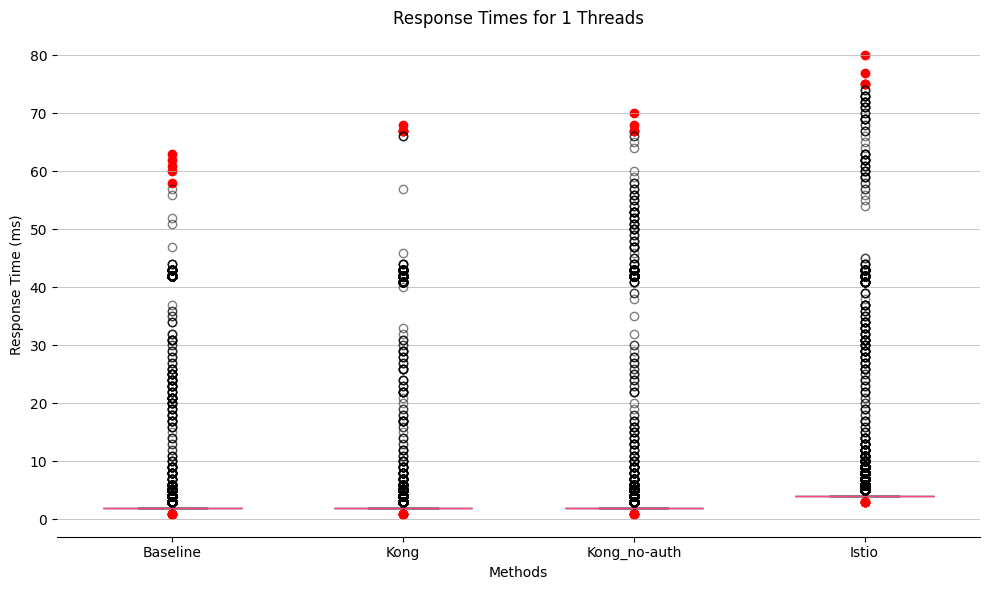

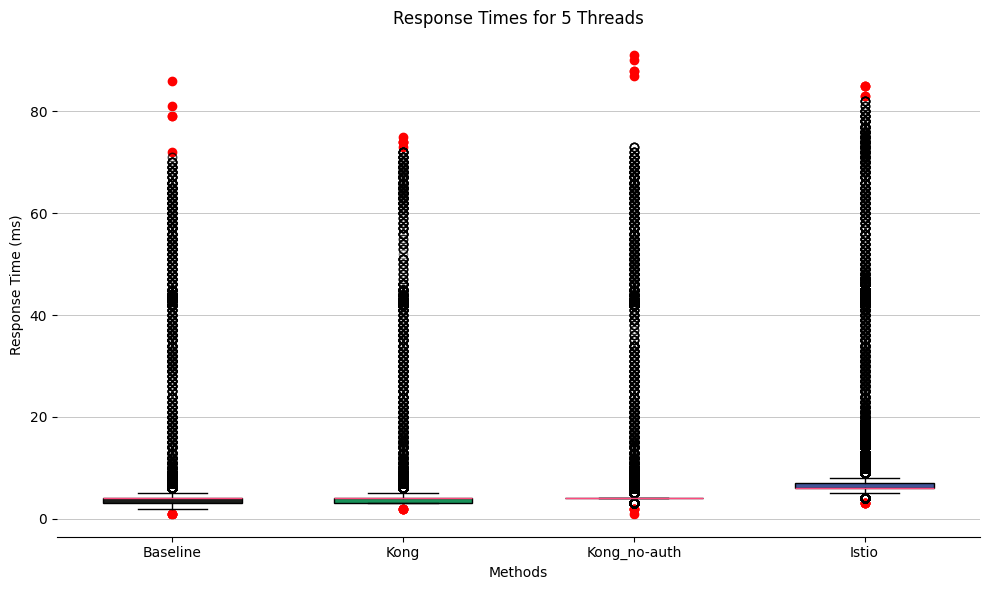

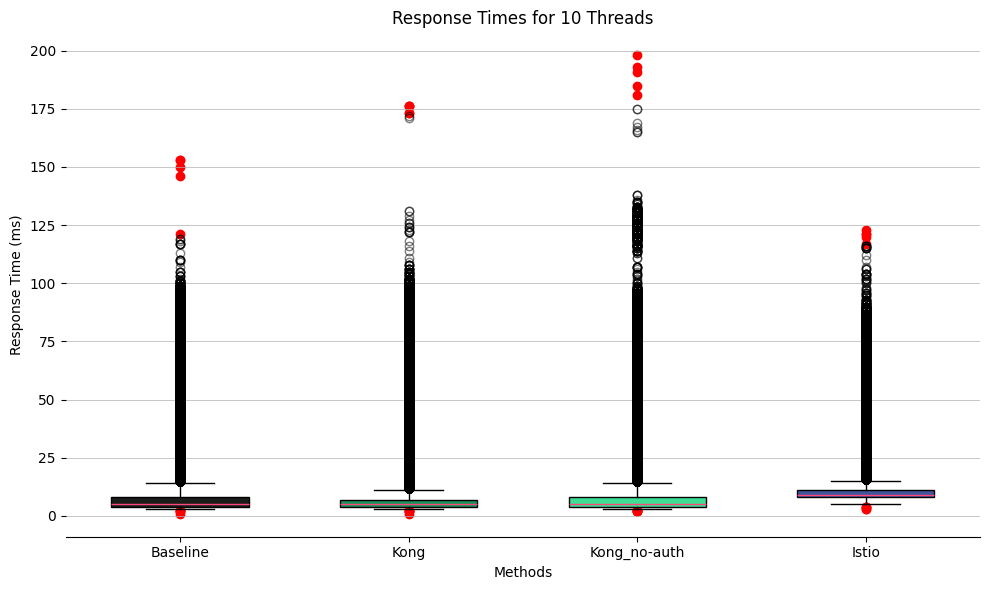

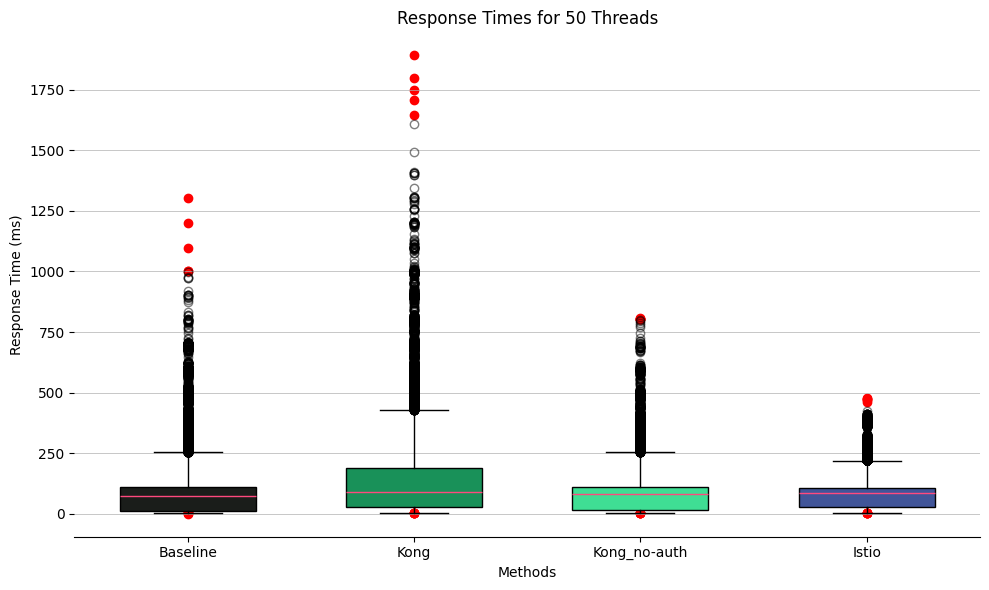

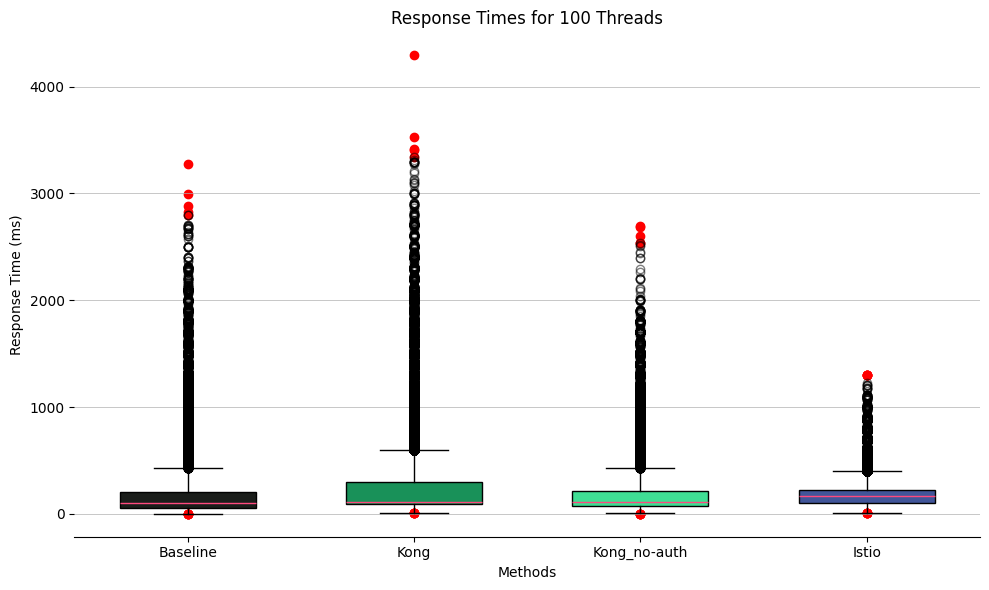

In [15]:
## RESPONSE TIMES

# Boxplot for each user group
for user in user_levels:
    fig, ax = plt.subplots(figsize=(10, 6))
    methods = list(response_times.keys())
    for i, method in enumerate(methods, start=1):
        if str(user) in response_times[method]:
            # Sorting data to find outliers
            data = np.array(response_times[method][str(user)])
            sorted_data = np.sort(data)
            n_outliers = 5
            extreme_values = np.concatenate((sorted_data[:n_outliers], sorted_data[-n_outliers:]))
            filtered_data = [x for x in data if x not in extreme_values]

            # Plot the boxplot without extreme outliers
            ax.boxplot(filtered_data, positions=[i], widths=0.6, patch_artist=True,
                       boxprops=dict(facecolor=colors[method], edgecolor='black'),
                       medianprops=dict(color=(255/255, 73/255, 126/255, 1)),
                       flierprops=dict(marker='o', color='grey', alpha=0.5))  # Customize non-extreme outliers if any remain

            # Overlay the selected outliers
            for outlier in extreme_values:
                ax.scatter([i], [outlier], color='red', marker='o')

    # Customizing the plot
    ax.set_title(f'Response Times for {user} Threads')
    ax.set_xlabel('Methods')
    ax.set_ylabel('Response Time (ms)')
    ax.set_xticks(range(1, len(methods) + 1))
    ax.set_xticklabels(methods)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)

    plt.tight_layout()
    plt.savefig(f'custom_plots/Boxplot_{str(user)}_Threads.png')
    plt.show()

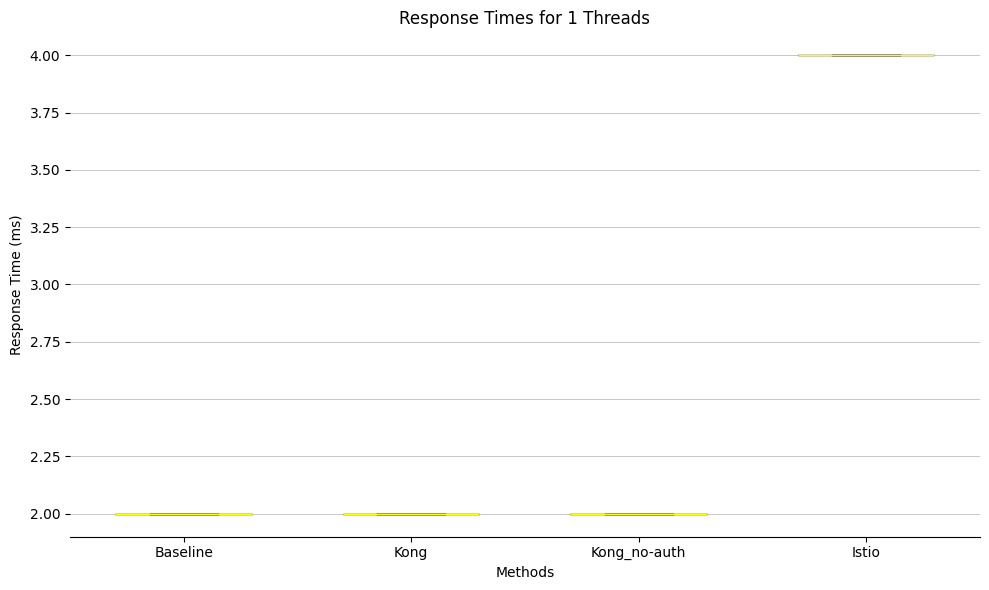

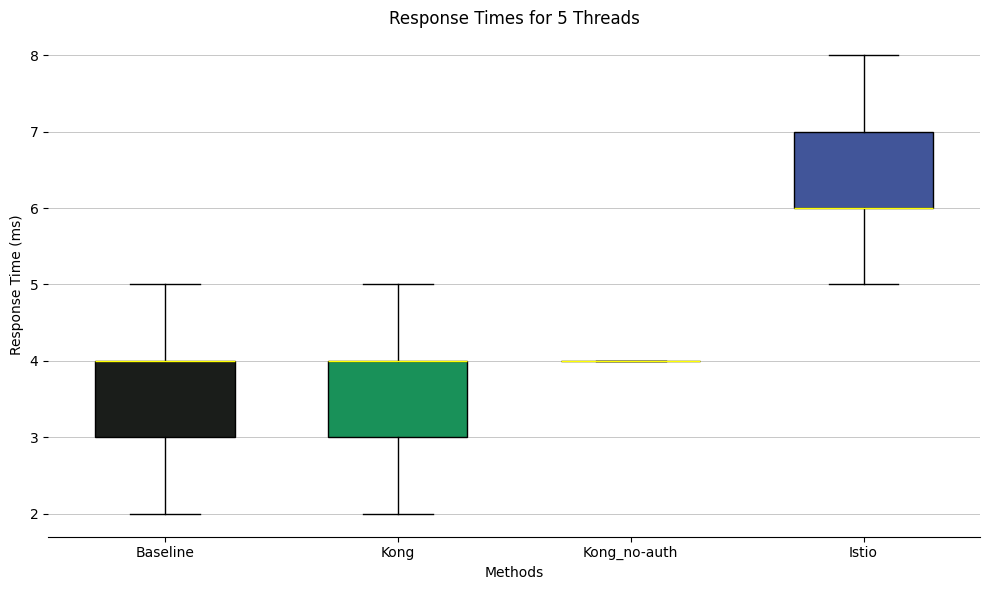

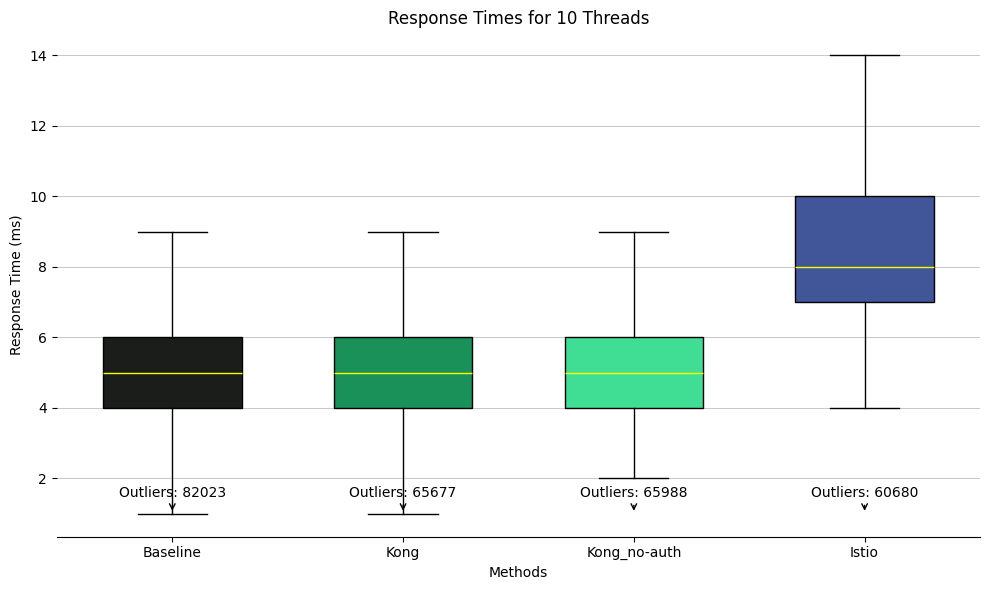

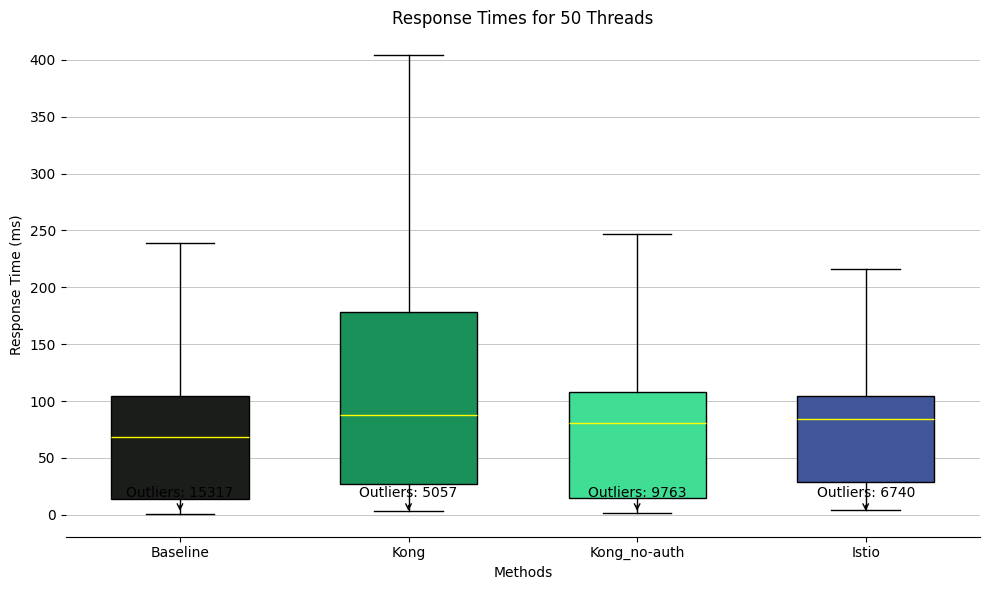

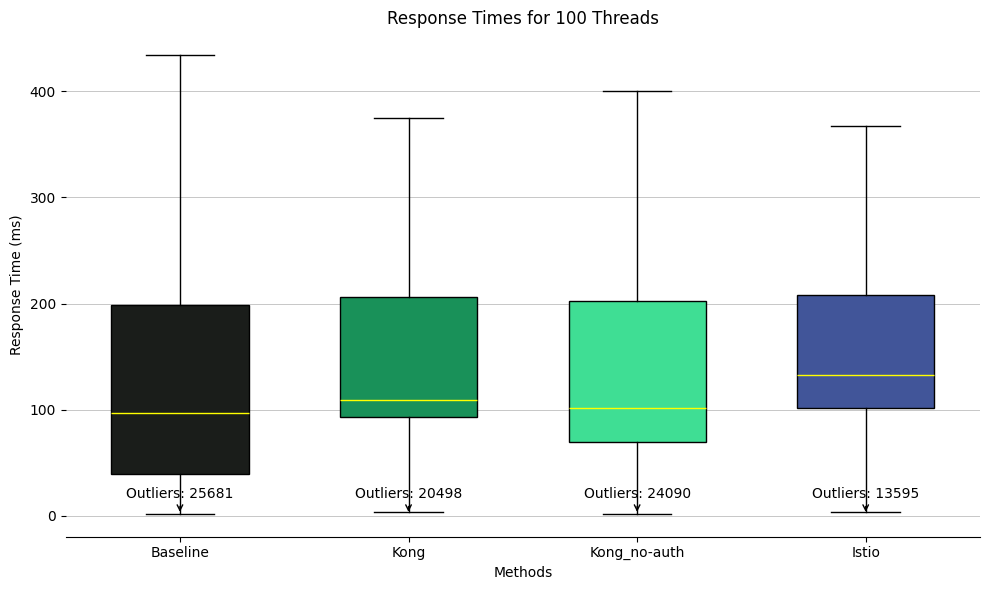

In [16]:
## ATTEMPT TO DECLUTTER BOXPLOT

# Plot for each user group
for user in user_levels:
    fig, ax = plt.subplots(figsize=(10, 6))
    methods = list(response_times.keys())
    for i, method in enumerate(methods, start=1):
        if str(user) in response_times[method]:
            data = np.array(response_times[method][str(user)])
            
            # Compute the IQR and identify outliers
            q1, q3 = np.percentile(data, [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Determine outliers
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            non_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
            
            # Plot the boxplot without showing outliers
            ax.boxplot(non_outliers, positions=[i], widths=0.6, patch_artist=True,
                       boxprops=dict(facecolor=colors[method], edgecolor='black'),
                       medianprops=dict(color='yellow'),
                       showfliers=False)  # Outliers are not shown

            # Annotate the plot with the number of outliers
            ax.annotate(f'Outliers: {len(outliers)}', xy=(i, 1), xycoords='data',
                        xytext=(0, 10), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                        ha='center', va='bottom')

    # Customizing the plot
    ax.set_title(f'Response Times for {user} Threads')
    ax.set_xlabel('Methods')
    ax.set_ylabel('Response Time (ms)')
    ax.set_xticks(range(1, len(methods) + 1))
    ax.set_xticklabels(methods)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)

    plt.tight_layout()
    plt.show()